In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("oasis_longitudinal.csv")
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [3]:
df.tail()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,R,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2.0,30.0,0.0,1327,0.796,1.323
372,OAS2_0186,OAS2_0186_MR3,Nondemented,3,1608,F,R,65,13,2.0,30.0,0.0,1333,0.801,1.317


In [4]:
df.isnull().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

In [5]:
df = df.loc[df['Visit']==1] 
df = df.reset_index(drop=True) 
df['M/F'] = df['M/F'].replace(['F','M'], [0,1])  
df['Group'] = df['Group'].replace(['Converted'], ['Demented']) # Target variable
df['Group'] = df['Group'].replace(['Demented', 'Nondemented'], [1,0]) 
df = df.drop(['MRI ID', 'Visit', 'Hand'], axis=1) # Drop unnecessary columns

In [6]:
df.head()

,Subject ID,Group,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,0,0,1,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0002,1,0,1,75,12,NaN,23.0,0.5,1678,0.736,1.046
2,OAS2_0004,0,0,0,88,18,3.0,28.0,0.0,1215,0.710,1.444
3,OAS2_0005,0,0,1,80,12,4.0,28.0,0.0,1689,0.712,1.039
4,OAS2_0007,1,0,1,71,16,NaN,28.0,0.5,1357,0.748,1.293


In [7]:
pd.isnull(df).sum() 

Subject ID    0
Group         0
MR Delay      0
M/F           0
Age           0
EDUC          0
SES           8
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

In [8]:
df_dropna = df.dropna(axis=0, how='any')
pd.isnull(df_dropna).sum()

Subject ID    0
Group         0
MR Delay      0
M/F           0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

In [9]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import cross_val_score

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, roc_curve, auc

In [11]:
Y = df_dropna['Group'].values 
X = df_dropna[['M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']] 


X_trainval_dna, X_test_dna, Y_trainval_dna, Y_test_dna = train_test_split(
    X, Y, random_state=0)


scaler = MinMaxScaler().fit(X_trainval_dna)
X_trainval_scaled_dna = scaler.transform(X_trainval_dna)
X_test_scaled_dna = scaler.transform(X_test_dna)

# LOGISTIC REGRESSION

In [12]:
# Create logistic regression model with best C parameter
best_model = LogisticRegression(C=10)
best_model.fit(X_trainval_scaled_dna, Y_trainval_dna)

# Evaluate the model on the test set
test_score = best_model.score(X_test_scaled_dna, Y_test_dna)

# Make predictions on the test set
predictions = best_model.predict(X_test_scaled_dna)

# Calculate recall and AUC
test_recall = recall_score(Y_test_dna, predictions)
fpr, tpr, thresholds = roc_curve(Y_test_dna, predictions)
test_auc = auc(fpr, tpr)

# Print the results
print("Test accuracy: {:.2f}".format(test_score))
print("Test recall: {:.2f}".format(test_recall))
print("Test AUC: {:.2f}".format(test_auc))

Test accuracy: 0.81
Test recall: 0.94
Test AUC: 0.81


# DECISION TREE

In [13]:
# Create decision tree model with the best parameter
decision_tree = DecisionTreeClassifier(max_depth=1, random_state=0)
decision_tree.fit(X_trainval_scaled_dna, Y_trainval_dna)

# Evaluate the model on the test set
test_score = decision_tree.score(X_test_scaled_dna, Y_test_dna)

# Make predictions on the test set
predictions = decision_tree.predict(X_test_scaled_dna)

# Calculate recall and AUC
test_recall = recall_score(Y_test_dna, predictions)
fpr, tpr, thresholds = roc_curve(Y_test_dna, predictions)
test_auc = auc(fpr, tpr)

# Print the results
print("Decision Tree - Test accuracy: {:.2f}".format(test_score))
print("Decision Tree - Test recall: {:.2f}".format(test_recall))
print("Decision Tree - Test AUC: {:.2f}".format(test_auc))

Decision Tree - Test accuracy: 0.92
Decision Tree - Test recall: 0.82
Decision Tree - Test AUC: 0.91


# RANDOM FOREST 

In [14]:
# Create random forest model with the best parameters
random_forest = RandomForestClassifier(n_estimators=14, max_depth=5, min_samples_split=7, random_state=0)
random_forest.fit(X_trainval_scaled_dna, Y_trainval_dna)

# Evaluate the model on the test set
test_score = random_forest.score(X_test_scaled_dna, Y_test_dna)

# Make predictions on the test set
predictions = random_forest.predict(X_test_scaled_dna)

# Calculate recall and AUC
test_recall = recall_score(Y_test_dna, predictions)
fpr, tpr, thresholds = roc_curve(Y_test_dna, predictions)
test_auc = auc(fpr, tpr)

# Print the results
print("Random Forest - Test accuracy: {:.2f}".format(test_score))
print("Random Forest - Test recall: {:.2f}".format(test_recall))
print("Random Forest - Test AUC: {:.2f}".format(test_auc))

Random Forest - Test accuracy: 0.78
Random Forest - Test recall: 0.94
Random Forest - Test AUC: 0.79


# SVM

In [15]:
# Create SVM model with best parameters
svm_model = SVC(C=100, kernel='rbf', gamma=0.1, random_state=0)
svm_model.fit(X_trainval_scaled_dna, Y_trainval_dna)

# Evaluate the model on the test set
test_score = svm_model.score(X_test_scaled_dna, Y_test_dna)

# Make predictions on the test set
predictions = svm_model.predict(X_test_scaled_dna)

# Calculate recall and AUC
test_recall = recall_score(Y_test_dna, predictions)
fpr, tpr, thresholds = roc_curve(Y_test_dna, predictions)
test_auc = auc(fpr, tpr)

# Print the results
print("SVM - Test accuracy: {:.2f}".format(test_score))
print("SVM - Test recall: {:.2f}".format(test_recall))
print("SVM - Test AUC: {:.2f}".format(test_auc))


SVM - Test accuracy: 0.69
SVM - Test recall: 0.88
SVM - Test AUC: 0.70


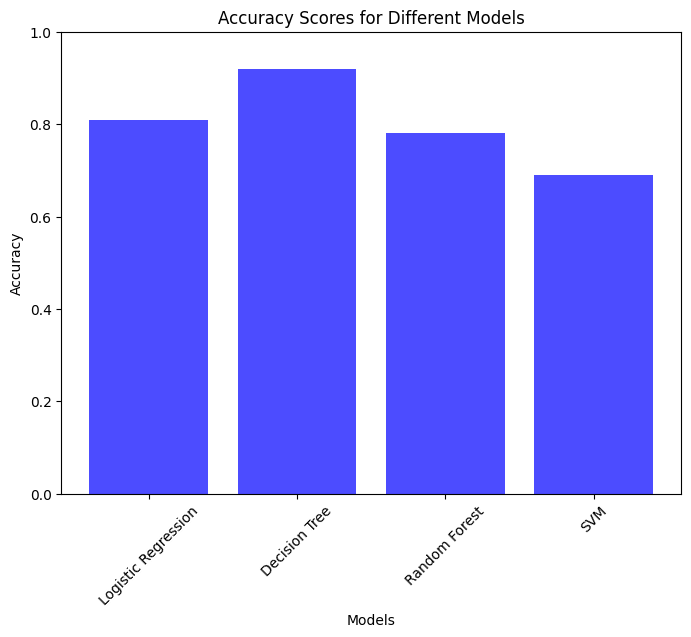

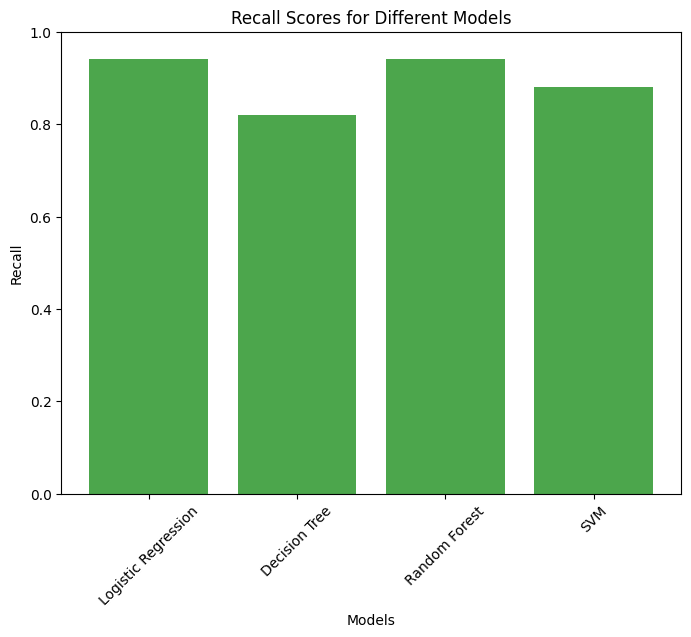

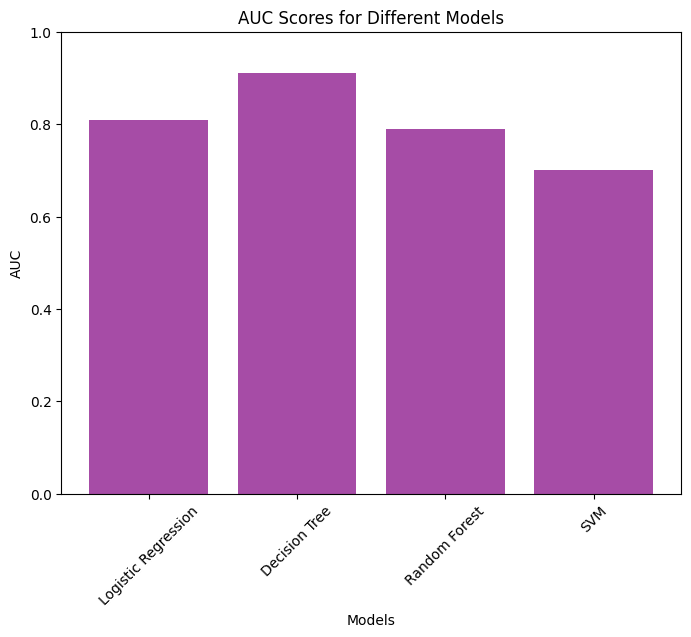

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Accuracy scores for different models
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM']
accuracy_scores = [0.81, 0.92, 0.78, 0.69]

# Recall scores for different models
recall_scores = [0.94, 0.82, 0.94, 0.88]

# AUC scores for different models
auc_scores = [0.81, 0.91, 0.79, 0.70]

# Plotting accuracy
plt.figure(figsize=(8, 6))
plt.bar(models, accuracy_scores, color='blue', alpha=0.7)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores for Different Models')
plt.ylim([0, 1])
plt.xticks(rotation=45)
plt.show()

# Plotting recall
plt.figure(figsize=(8, 6))
plt.bar(models, recall_scores, color='green', alpha=0.7)
plt.xlabel('Models')
plt.ylabel('Recall')
plt.title('Recall Scores for Different Models')
plt.ylim([0, 1])
plt.xticks(rotation=45)
plt.show()

# Plotting AUC
plt.figure(figsize=(8, 6))
plt.bar(models, auc_scores, color='purple', alpha=0.7)
plt.xlabel('Models')
plt.ylabel('AUC')
plt.title('AUC Scores for Different Models')
plt.ylim([0, 1])
plt.xticks(rotation=45)
plt.show()